In [1]:
# Import libraries

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import datetime
import cmocean
import sys
import pyfesom2 as pf

osgeo is not installed, conversion to Geo formats like Geotiff (fesom2GeoFormat) will not work.


In [2]:
# Load the mesh

alpha, beta, gamma=[0, 0, 0]
print("mesh will be loaded")
meshpath = '/albedo/work/projects/p_clidyn_work/rjuhrban/channel/test_10/'
mesh = pf.load_mesh(meshpath, abg=[alpha, beta, gamma], usepickle = False)
resultpath = f'{meshpath}results/'
meshdiag = xr.open_mfdataset(f'{resultpath}/fesom.mesh.diag.nc')

mesh will be loaded
Load 2d part of the mesh in 0 second(s)


In [21]:
# Set up X and Y for elements

elem_n = meshdiag.elements.shape[1]

xx2=np.zeros(shape=(elem_n)) 
yy2=np.zeros(shape=(elem_n))

for i in np.arange(0,elem_n):
    xx2[i]=mesh.x2[mesh.elem[i,:]].mean(axis=0)
    yy2[i]=mesh.y2[mesh.elem[i,:]].mean(axis=0)

In [15]:
# Data selection
str_id = 'temp'
year = 1965
level = 0
time = -1
dat = xr.open_dataset(f'{resultpath}/{str_id}.fesom.{year}.nc')[str_id]
dat = dat.isel(time=time, nz1=level) # may need to change nz1 to nz, depending on quantity you plot
dat = dat.squeeze()

In [19]:
# Choose correct X and Y for quantities on nodes or elements
if 'nod2' in dat.dims:
    X = meshdiag.lon
    Y = meshdiag.lat
elif 'elem' in dat.dims:
    X = xx2
    Y = yy2
else:
    print('Error!')

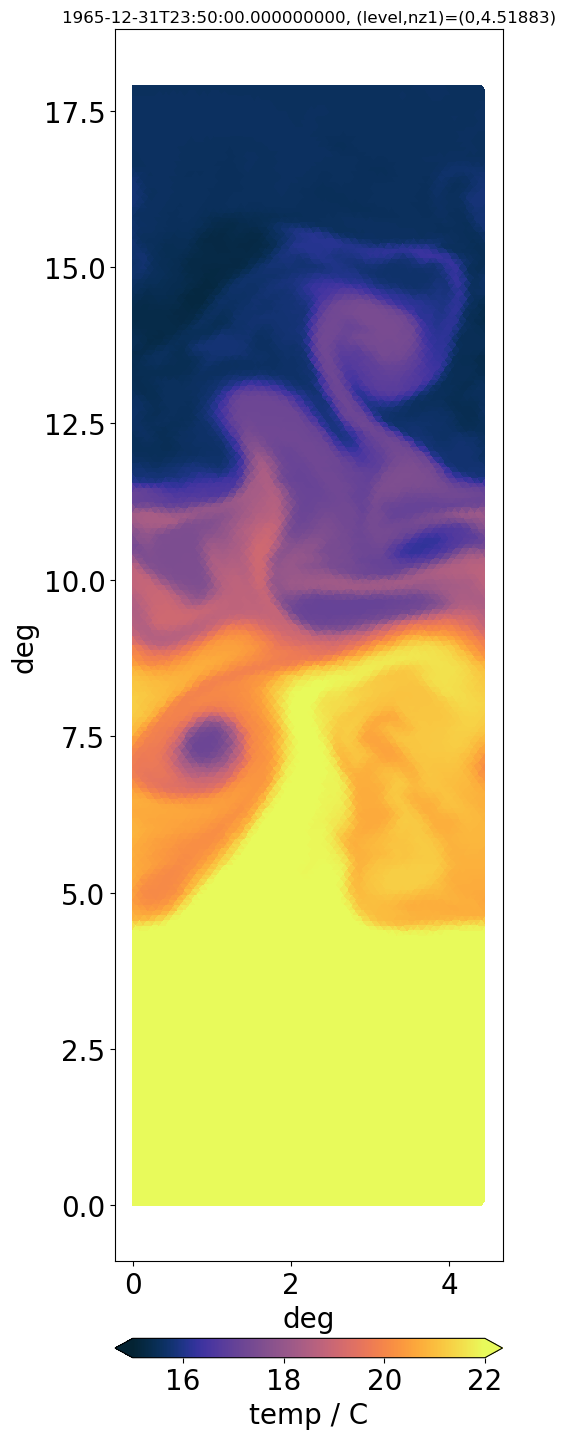

In [20]:
vmin, vmax = np.round(dat.min().values), np.round(dat.max().values)
cmap = cmocean.cm.thermal

cbartext, cont	= f'{str_id} / {dat.units}', [vmin, vmax, .001]
bounds=np.linspace(vmin,vmax,100)
fig, ax = plt.subplots(figsize=(5,20))
#plt.gca().set_aspect('equal')

im = ax.tripcolor(X, Y, dat, shading='flat', cmap=cmap) 

plt.tick_params(axis='both', labelsize=20)
plt.xlabel('deg', size=20)
plt.ylabel('deg', size=20)

cbar = fig.colorbar(im, orientation='horizontal', pad=.05, extend='both') #  ticks=[v_min, 0, v_max],
im.set_clim(vmin, vmax)
cbar.set_label(cbartext, size=20)
#cbar.set_ticks([round(i,8) for i in np.linspace(cont[0], cont[1], 5)], fontsize=20)
#cbar.set_ticklabels([round(i,8) for i in np.linspace(cont[0], cont[1], 5)], fontsize=20)
cbar.ax.tick_params(labelsize=20)
plt.title(f'{dat.time.values}, (level,nz1)=({level},{dat.nz1.values})')

plt.show(block=False)